In [17]:
from bs4 import BeautifulSoup

In [18]:
import nltk

In [19]:
soup = BeautifulSoup(open("all_cleaned/berkeley.html").read())

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [20]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
 <head>
  <meta/>
  <title>
   City Council Report ##-##-####
  </title>
  <meta/>
  <meta/>
 </head>
 <body>
  ORDINANCE NO. 7,536-N.S.  ZONING ORDINANCE AMENDMENT TO CHAPTERS 23D.10 AND 23F.04 OF THE BERKELEY MUNICIPAL CODE TO MAINTAIN CONSISTENCY WITH CALIFORNIA CODE SECTION 65852.2  BE IT ORDAINED by the Council of the City of Berkeley as follows:  Section 1. That Berkeley Municipal Code 23D.10.040 Development Standards is amended to read as follows:
  <h1>
   23D.10.040 Accessory Dwelling Unit Standards
  </h1>
  <ol>
   <li>
    Special Provisions:
    <ol>
     <li>
      No subdivision of land, air rights or condominium is allowed so as to enable the sale or transfer of the Accessory Dwelling Unit independently of the main Dwelling Unit or other portions of the property.
     </li>
     <li>
      Prior to issuance of a Building Permit, all owners of 

In [6]:
# soup.find('table').decompose()

In [21]:
all_text = soup.get_text()

In [22]:
print(all_text)





   City Council Report ##-##-####
  




  ORDINANCE NO. 7,536-N.S.  ZONING ORDINANCE AMENDMENT TO CHAPTERS 23D.10 AND 23F.04 OF THE BERKELEY MUNICIPAL CODE TO MAINTAIN CONSISTENCY WITH CALIFORNIA CODE SECTION 65852.2  BE IT ORDAINED by the Council of the City of Berkeley as follows:  Section 1. That Berkeley Municipal Code 23D.10.040 Development Standards is amended to read as follows:
  
   23D.10.040 Accessory Dwelling Unit Standards
  


    Special Provisions:
    

      No subdivision of land, air rights or condominium is allowed so as to enable the sale or transfer of the Accessory Dwelling Unit independently of the main Dwelling Unit or other portions of the property.
     

      Prior to issuance of a Building Permit, all owners of record of the subject property shall sign and file a Declaration of Restrictions with the County Recorder, in a form satisfactory to the Zoning Officer, which makes any transfer of the property specifically subject to the restrictions containe

# Sentence Tokenization

In [23]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
all_text_newline_removed = all_text.replace("\n", " ")
# all_text_newline_removed = all_text_newline_removed.replace("  ", " ")

In [25]:
all_text_newline_removed

'       City Council Report ##-##-####          ORDINANCE NO. 7,536-N.S.  ZONING ORDINANCE AMENDMENT TO CHAPTERS 23D.10 AND 23F.04 OF THE BERKELEY MUNICIPAL CODE TO MAINTAIN CONSISTENCY WITH CALIFORNIA CODE SECTION 65852.2  BE IT ORDAINED by the Council of the City of Berkeley as follows:  Section 1. That Berkeley Municipal Code 23D.10.040 Development Standards is amended to read as follows:       23D.10.040 Accessory Dwelling Unit Standards          Special Provisions:             No subdivision of land, air rights or condominium is allowed so as to enable the sale or transfer of the Accessory Dwelling Unit independently of the main Dwelling Unit or other portions of the property.              Prior to issuance of a Building Permit, all owners of record of the subject property shall sign and file a Declaration of Restrictions with the County Recorder, in a form satisfactory to the Zoning Officer, which makes any transfer of the property specifically subject to the restrictions contain

In [26]:
for i in sent_tokenize(all_text_newline_removed):
    print("*"*80)
    print(i)

********************************************************************************
       City Council Report ##-##-####          ORDINANCE NO.
********************************************************************************
7,536-N.S.
********************************************************************************
ZONING ORDINANCE AMENDMENT TO CHAPTERS 23D.10 AND 23F.04 OF THE BERKELEY MUNICIPAL CODE TO MAINTAIN CONSISTENCY WITH CALIFORNIA CODE SECTION 65852.2  BE IT ORDAINED by the Council of the City of Berkeley as follows:  Section 1.
********************************************************************************
That Berkeley Municipal Code 23D.10.040 Development Standards is amended to read as follows:       23D.10.040 Accessory Dwelling Unit Standards          Special Provisions:             No subdivision of land, air rights or condominium is allowed so as to enable the sale or transfer of the Accessory Dwelling Unit independently of the main Dwelling Unit or other portions of t

# Stemming

In [25]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

for sentence in sent_tokenize(all_text_newline_removed):
    print("*"*80)
    words = sentence.split(" ")
    real_words = [ps.stem(x) for x in words if x]
    print(" ".join(real_words))
    

# POS

In [27]:
import nltk

# POS tag list:

## CC	coordinating conjunction
## CD	cardinal digit
## DT	determiner
## EX	existential there (like: "there is" ... think of it like "there exists")
## FW	foreign word
## IN	preposition/subordinating conjunction
## JJ	adjective	'big'
## JJR	adjective, comparative	'bigger'
## JJS	adjective, superlative	'biggest'
## LS	list marker	1)
## MD	modal	could, will
## NN	noun, singular 'desk'
## NNS	noun plural	'desks'
## NNP	proper noun, singular	'Harrison'
## NNPS	proper noun, plural	'Americans'
## PDT	predeterminer	'all the kids'
## POS	possessive ending	parent\'s
## PRP	personal pronoun	I, he, she
## PRP  \$	possessive pronoun	my, his, hers
## RB	adverb	very, silently,
## RBR	adverb, comparative	better
## RBS	adverb, superlative	best
## RP	particle	give up
## TO	to	go 'to' the store.
## UH	interjection	errrrrrrrm
## VB	verb, base form	take
## VBD	verb, past tense	took
## VBG	verb, gerund/present participle	taking
## VBN	verb, past participle	taken
## VBP	verb, sing. present, non-3d	take
## VBZ	verb, 3rd person sing. present	takes
## WDT	wh-determiner	which
## WP	wh-pronoun	who, what
## WP \$	possessive wh-pronoun	whose
## WRB	wh-abverb	where, when

In [28]:
all_sentences = sent_tokenize(all_text_newline_removed)

In [29]:
tagged = []
for i in all_sentences:
    words = nltk.word_tokenize(i)
    tagged.append(nltk.pos_tag(words))
print(tagged)

[[('City', 'NNP'), ('Council', 'NNP'), ('Report', 'NNP'), ('#', '#'), ('#', '#'), ('-', ':'), ('#', '#'), ('#', '#'), ('-', ':'), ('#', '#'), ('#', '#'), ('#', '#'), ('#', '#'), ('ORDINANCE', 'NNP'), ('NO', 'NNP'), ('.', '.')], [('7,536-N.S', 'JJ'), ('.', '.')], [('ZONING', 'NN'), ('ORDINANCE', 'NNP'), ('AMENDMENT', 'NNP'), ('TO', 'NNP'), ('CHAPTERS', 'NNP'), ('23D.10', 'CD'), ('AND', 'NNP'), ('23F.04', 'CD'), ('OF', 'IN'), ('THE', 'NNP'), ('BERKELEY', 'NNP'), ('MUNICIPAL', 'NNP'), ('CODE', 'NNP'), ('TO', 'NNP'), ('MAINTAIN', 'NNP'), ('CONSISTENCY', 'NNP'), ('WITH', 'NNP'), ('CALIFORNIA', 'NNP'), ('CODE', 'NNP'), ('SECTION', 'NNP'), ('65852.2', 'CD'), ('BE', 'NNP'), ('IT', 'NNP'), ('ORDAINED', 'NNP'), ('by', 'IN'), ('the', 'DT'), ('Council', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('of', 'IN'), ('Berkeley', 'NNP'), ('as', 'IN'), ('follows', 'VBZ'), (':', ':'), ('Section', 'NN'), ('1', 'CD'), ('.', '.')], [('That', 'DT'), ('Berkeley', 'NNP'), ('Municipal', 'NNP'), ('Code',

In [52]:
tagged

[[('City', 'NNP'),
  ('Council', 'NNP'),
  ('Report', 'NNP'),
  ('#', '#'),
  ('#', '#'),
  ('-', ':'),
  ('#', '#'),
  ('#', '#'),
  ('-', ':'),
  ('#', '#'),
  ('#', '#'),
  ('#', '#'),
  ('#', '#'),
  ('ORDINANCE', 'NNP'),
  ('NO', 'NNP'),
  ('.', '.')],
 [('7,536-N.S', 'JJ'), ('.', '.')],
 [('ZONING', 'NN'),
  ('ORDINANCE', 'NNP'),
  ('AMENDMENT', 'NNP'),
  ('TO', 'NNP'),
  ('CHAPTERS', 'NNP'),
  ('23D.10', 'CD'),
  ('AND', 'NNP'),
  ('23F.04', 'CD'),
  ('OF', 'IN'),
  ('THE', 'NNP'),
  ('BERKELEY', 'NNP'),
  ('MUNICIPAL', 'NNP'),
  ('CODE', 'NNP'),
  ('TO', 'NNP'),
  ('MAINTAIN', 'NNP'),
  ('CONSISTENCY', 'NNP'),
  ('WITH', 'NNP'),
  ('CALIFORNIA', 'NNP'),
  ('CODE', 'NNP'),
  ('SECTION', 'NNP'),
  ('65852.2', 'CD'),
  ('BE', 'NNP'),
  ('IT', 'NNP'),
  ('ORDAINED', 'NNP'),
  ('by', 'IN'),
  ('the', 'DT'),
  ('Council', 'NNP'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('City', 'NNP'),
  ('of', 'IN'),
  ('Berkeley', 'NNP'),
  ('as', 'IN'),
  ('follows', 'VBZ'),
  (':', ':'),
  ('Section',

In [30]:
from nltk.chunk import *
from nltk.chunk.util import *
from nltk.chunk.regexp import *
from nltk import Tree

In [107]:
grammar = "NP: {<DT>?<JJ.*>*<CD>?<(NN|NNS|NNP|NNPS).*>+}"

In [108]:
cp = nltk.RegexpParser(grammar)

In [109]:
result = cp.parse(tagged[23])

In [110]:
print(result)

(S
  (NP Replacement/NN)
  parking/VBG
  shall/MD
  not/RB
  be/VB
  subject/JJ
  to/TO
  (NP the/DT applicable/JJ standards/NNS)
  of/IN
  (NP Section/NN)
  23D.12.050/CD
  nor/CC
  (NP Section/NNP)
  23D.12.080/CD
  ,/,
  and/CC
  may/MD
  be/VB
  located/VBN
  within/IN
  (NP the/DT required/JJ front/NN)
  and/CC
  (NP side/NN setbacks/NNS)
  when/WRB
  located/VBN
  within/IN
  an/DT
  existing/VBG
  (NP driveway/NN)
  that/WDT
  does/VBZ
  not/RB
  comply/VB
  with/IN
  (NP these/DT standards/NNS)
  ./.)


In [21]:
result.draw()

In [37]:
all_sentences[24]

'An ADU may only be approved when located on a lot with access from a roadway with a minimum 26 feet in pavement width, unless an AUP is approved.'

In [111]:
results= []
for sentence in tagged:
    result = cp.parse(sentence)
    results.append(result)
#     result.draw()
#     print("*"*80)

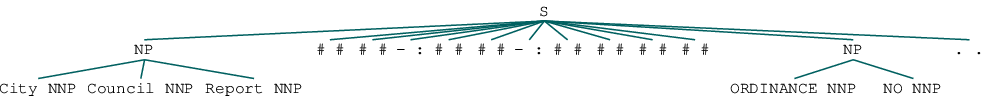

In [112]:
results[0]

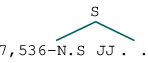

In [113]:
results[1]

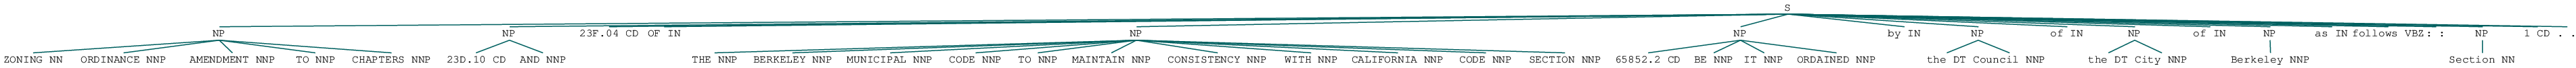

In [114]:
results[2]

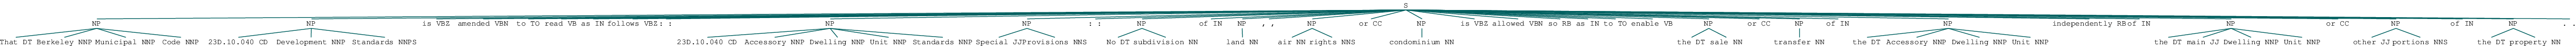

In [115]:
results[3]

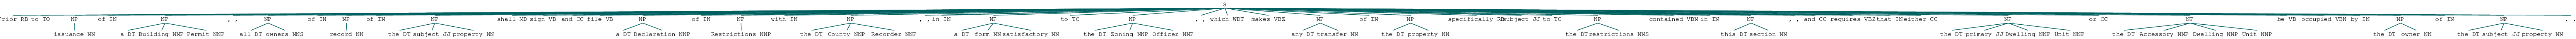

In [116]:
results[4]

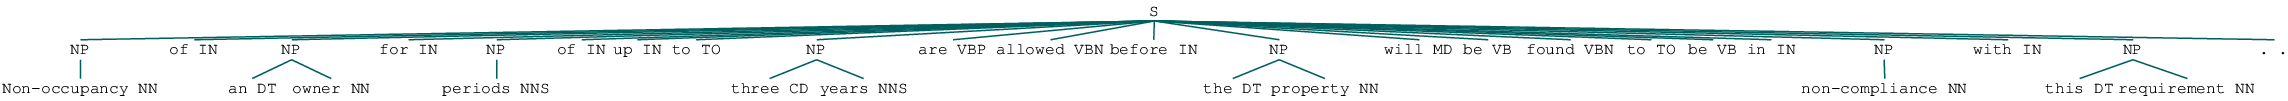

In [117]:
results[5]

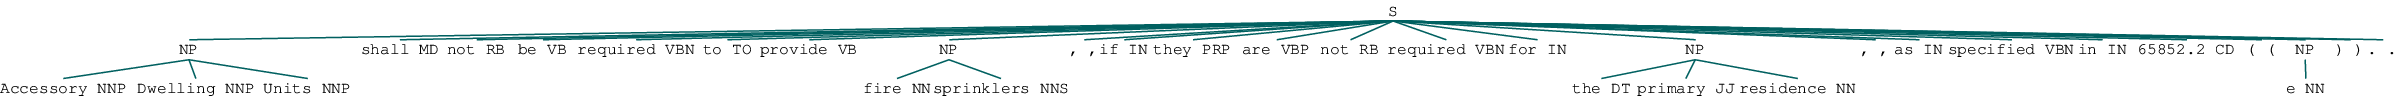

In [118]:
results[6]

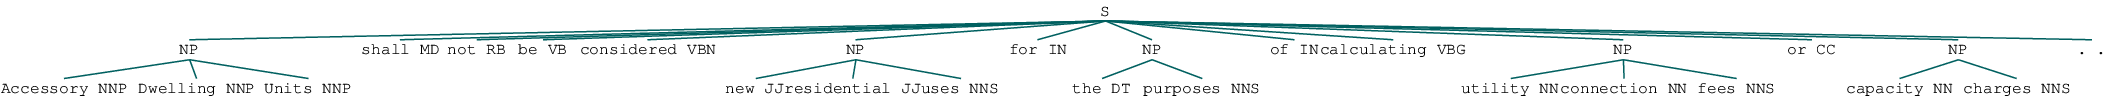

In [119]:
results[7]

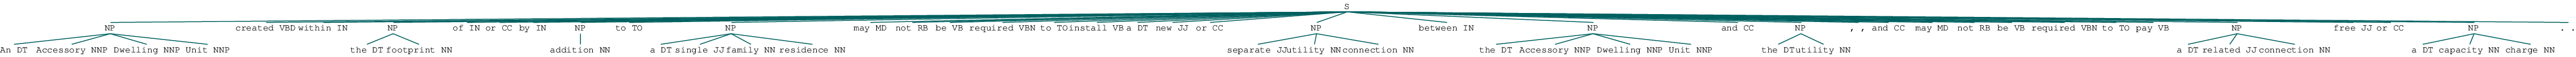

In [120]:
results[8]#imp

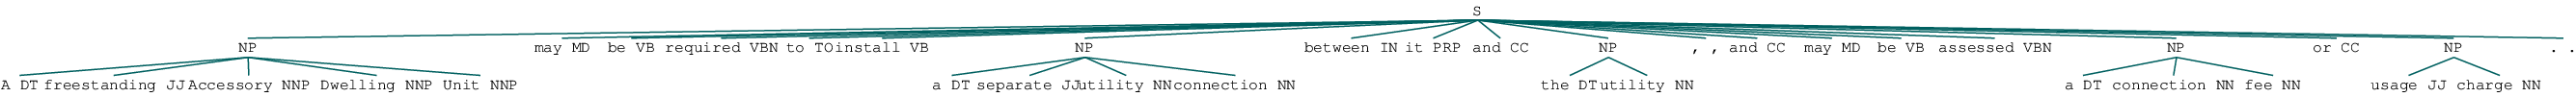

In [121]:
results[9]

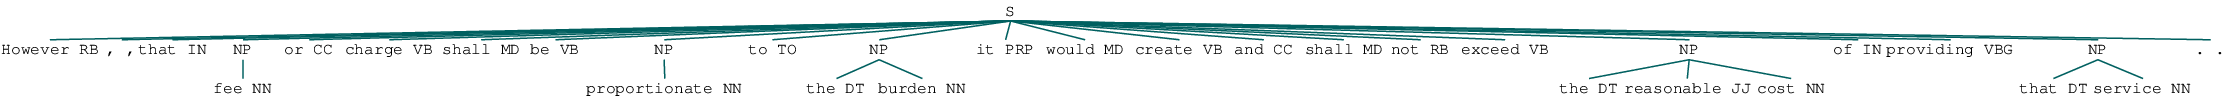

In [122]:
results[10]

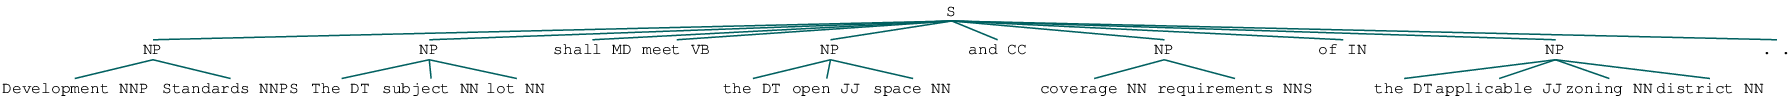

In [123]:
results[11]

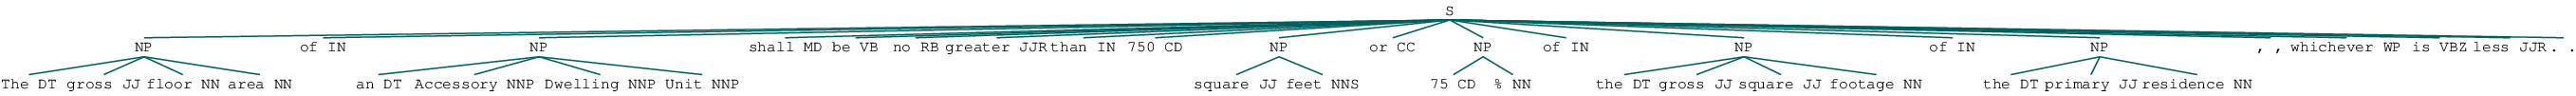

In [124]:
results[12]

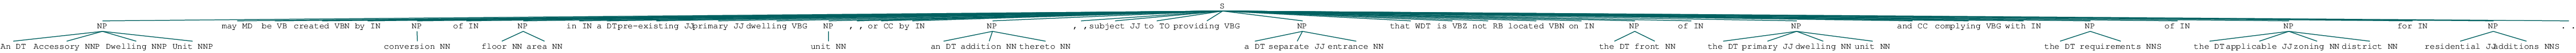

In [125]:
results[13]

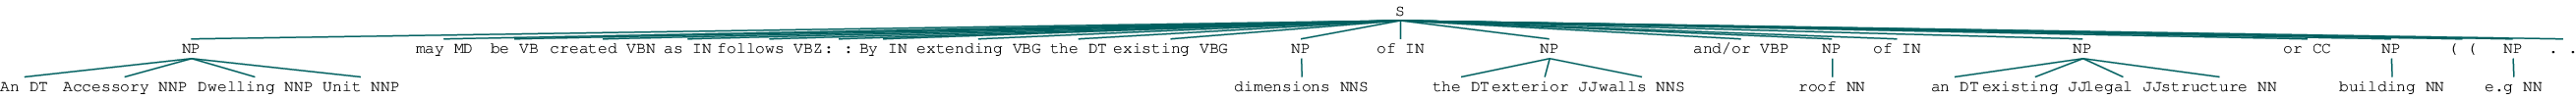

In [126]:
results[14]

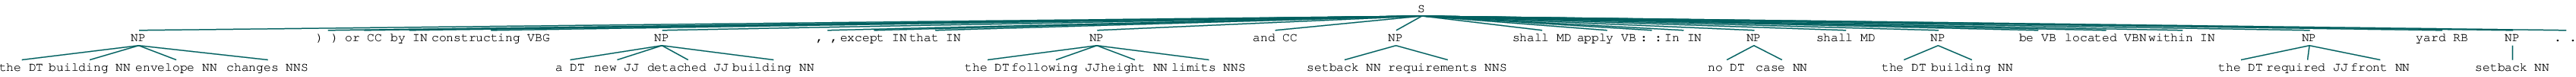

In [127]:
results[15]

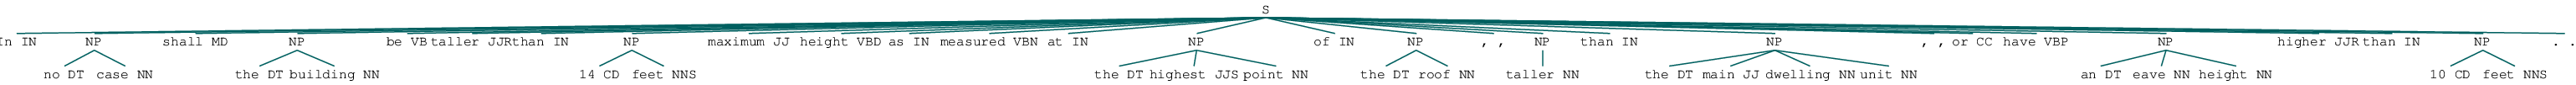

In [128]:
results[16]

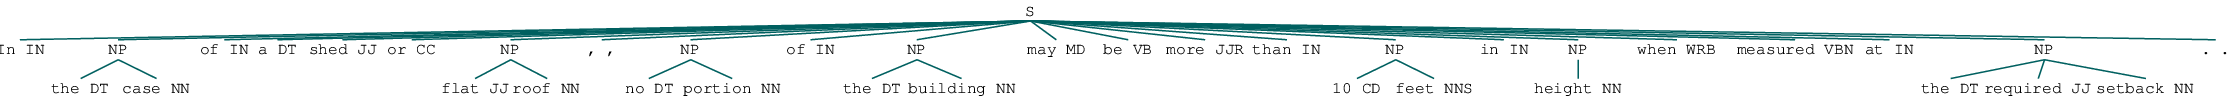

In [129]:
results[17]

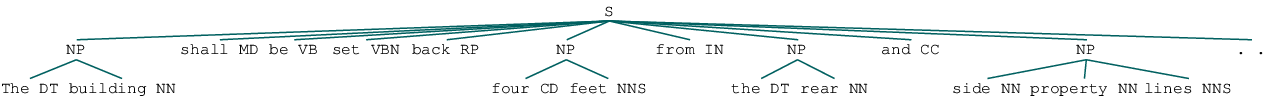

In [130]:
results[18]

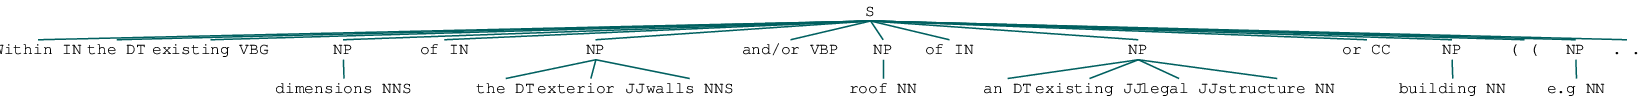

In [131]:
results[19]

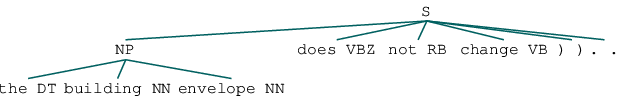

In [132]:
results[20]

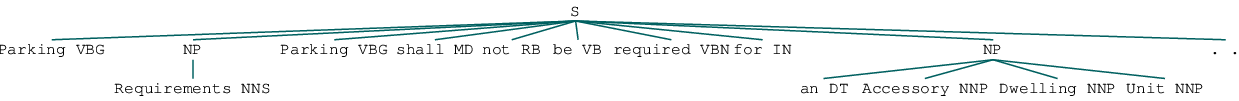

In [133]:
results[21]

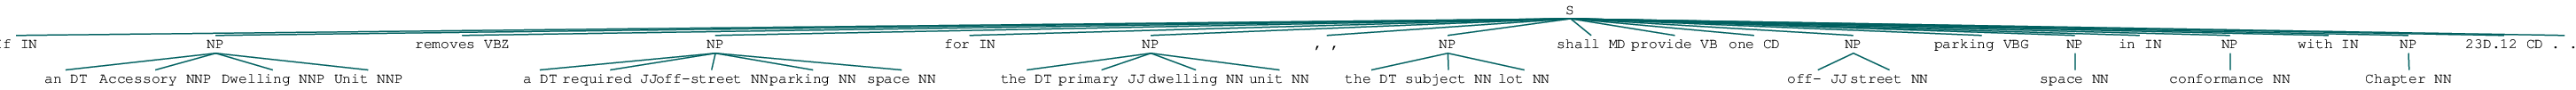

In [134]:
results[22]

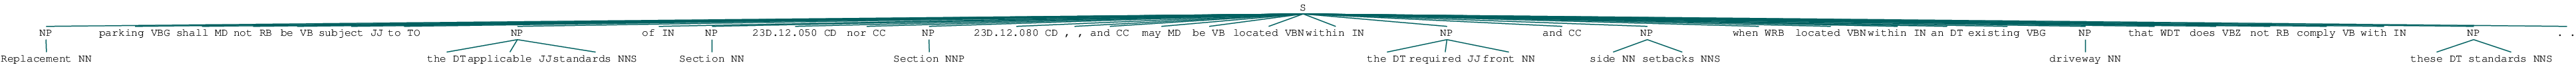

In [135]:
results[23]

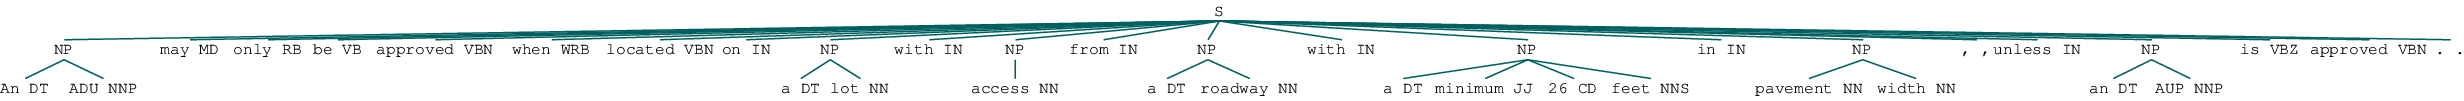

In [136]:
results[24]

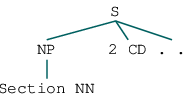

In [137]:
results[25]

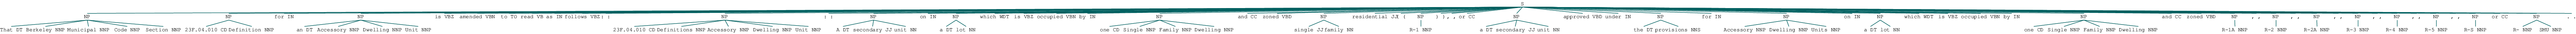

In [138]:
results[26]

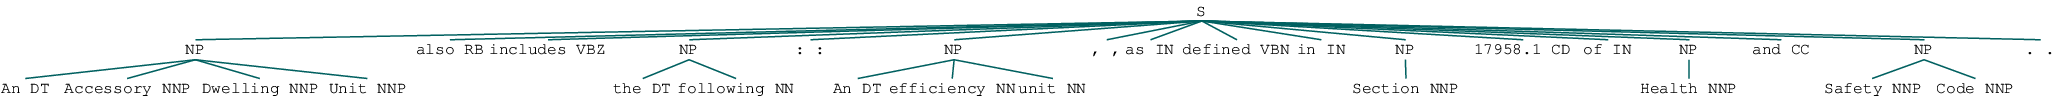

In [139]:
results[27]

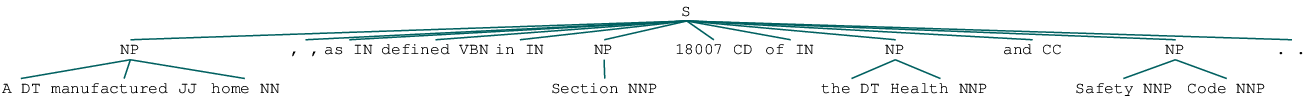

In [140]:
results[28]

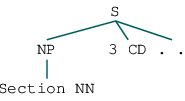

In [141]:
results[29]

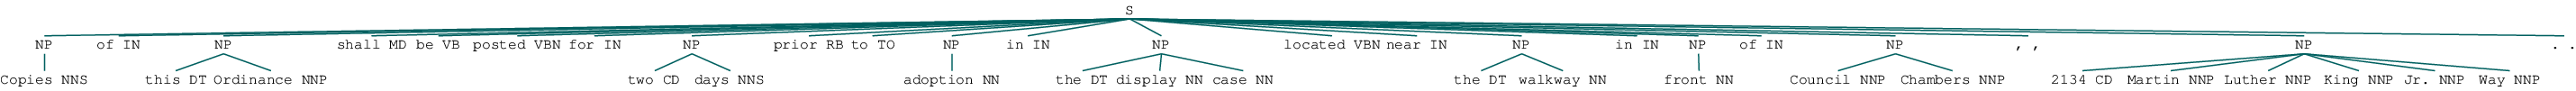

In [142]:
results[30]

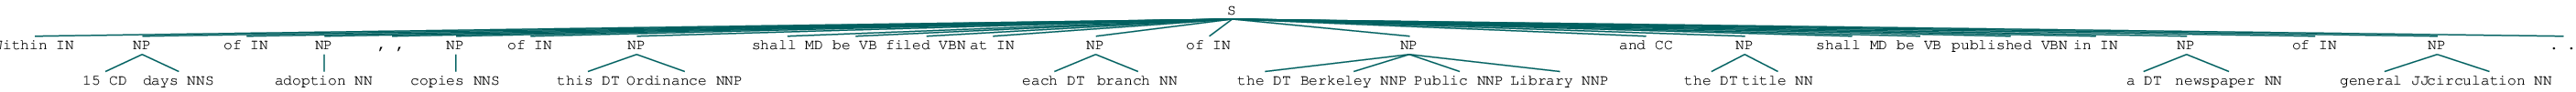

In [143]:
results[31]

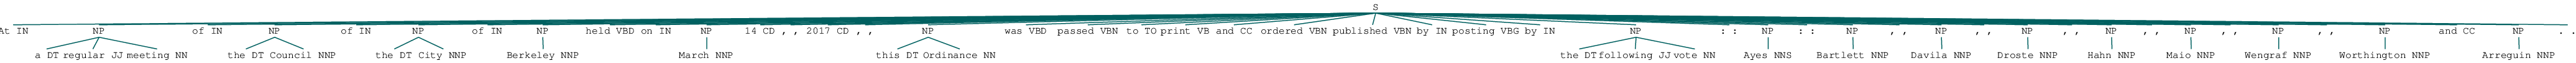

In [144]:
results[32]

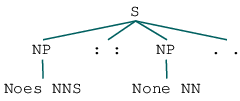

In [145]:
results[33]

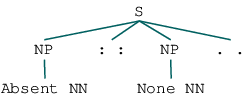

In [146]:
results[34]